coletar dados http://ftp.cptec.inpe.br/modelos/tempo/WRF/ams_07km/brutos/2024/02/03/00/

no terminal, transformar dados em grib2 para netcdf

cdo -f nc copy WRF_cpt_07KM_2023080400_2023080400.grib2 testegribWRF.nc

dados da bacia em .shp
https://metadados.snirh.gov.br/geonetwork/srv/api/records/c104850f-9cda-4c09-ad6e-62248c26ded0

In [8]:
import netCDF4 as nc

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

#  arquivo NetCDF
caminho_arquivo = '../../Grads_teste/testegribWRF.nc'

# Abra o arquivo NetCDF
arquivo_nc = nc.Dataset(caminho_arquivo, 'r')

#!pip install cartopy

In [9]:
ds = xr.open_dataset(caminho_arquivo)
ds

/home/casamentos/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<xarray.Dataset>
Dimensions:        (time: 1, lon: 1019, lat: 1081, lev: 1, plev: 25, height: 2,
                    depth: 4, bnds: 2, height_2: 1, height_3: 1, plev_2: 1,
                    lev_2: 1, lev_3: 1, lev_4: 1, lev_5: 1, height_4: 2,
                    height_5: 1, lev_6: 1, lev_7: 1, height_6: 1, lev_8: 1,
                    lev_9: 3, lev_10: 1)
Coordinates: (12/22)
  * time           (time) datetime64[ns] 2023-08-04
  * lon            (lon) float64 269.3 269.4 269.5 269.5 ... 340.4 340.5 340.6
  * lat            (lat) float64 -57.9 -57.83 -57.76 -57.69 ... 17.56 17.63 17.7
  * lev            (lev) float64 0.0
  * plev           (plev) float64 5e+03 1e+04 1.5e+04 ... 9.5e+04 9.75e+04 1e+05
  * height         (height) float64 4e+03 1e+03
    ...             ...
  * lev_6          (lev_6) float64 0.0
  * lev_7          (lev_7) float64 0.0
  * height_6       (height_6) float64 100.0
  * lev_8          (lev_8) float64 9e+03
  * lev_9          (lev_9) float64 4.5e+03 9e+03 1.275e+04
  * lev_10         (lev_10) float64 1.275e+04
Dimensions without coordinates: bnds
Data variables: (12/81)
    depth_bnds     (depth, bnds) float64 ...
    plev_2_bnds    (plev_2, bnds) float64 ...
    height_4_bnds  (height_4, bnds) float64 ...
    height_5_bnds  (height_5, bnds) float64 ...
    lev_8_bnds     (lev_8, bnds) float64 ...
    lev_9_bnds     (lev_9, bnds) float64 ...
    ...             ...
    cape_2         (time, lev_9, lat, lon) float32 ...
    cin_2          (time, lev_9, lat, lon) float32 ...
    hpbl           (time, lat, lon) float32 ...
    plpl           (time, lev_10, lat, lon) float32 ...
    lsm            (time, lat, lon) float32 ...
    al             (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sat Aug 05 23:24:00 2023: cdo -f nc copy WRF_cpt_07KM_20230...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [10]:
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:        (time: 1, lat: 1081, lev: 1, plev: 25, height: 2, depth: 4,
                    bnds: 2, height_2: 1, height_3: 1, plev_2: 1, lev_2: 1,
                    lev_3: 1, lev_4: 1, lev_5: 1, height_4: 2, height_5: 1,
                    lev_6: 1, lev_7: 1, height_6: 1, lev_8: 1, lev_9: 3,
                    lev_10: 1, lon: 1019)
Coordinates: (12/22)
  * time           (time) datetime64[ns] 2023-08-04
  * lat            (lat) float64 -57.9 -57.83 -57.76 -57.69 ... 17.56 17.63 17.7
  * lev            (lev) float64 0.0
  * plev           (plev) float64 5e+03 1e+04 1.5e+04 ... 9.5e+04 9.75e+04 1e+05
  * height         (height) float64 4e+03 1e+03
  * depth          (depth) float64 0.05 0.25 0.7 1.5
    ...             ...
  * lev_7          (lev_7) float64 0.0
  * height_6       (height_6) float64 100.0
  * lev_8          (lev_8) float64 9e+03
  * lev_9          (lev_9) float64 4.5e+03 9e+03 1.275e+04
  * lev_10         (lev_10) float64 1.275e+04
  * lon            (lon) float64 -90.67 -90.6 -90.53 ... -19.55 -19.48 -19.41
Dimensions without coordinates: bnds
Data variables: (12/81)
    depth_bnds     (depth, bnds) float64 ...
    plev_2_bnds    (plev_2, bnds) float64 ...
    height_4_bnds  (height_4, bnds) float64 ...
    height_5_bnds  (height_5, bnds) float64 ...
    lev_8_bnds     (lev_8, bnds) float64 ...
    lev_9_bnds     (lev_9, bnds) float64 ...
    ...             ...
    cape_2         (time, lev_9, lat, lon) float32 ...
    cin_2          (time, lev_9, lat, lon) float32 ...
    hpbl           (time, lat, lon) float32 ...
    plpl           (time, lev_10, lat, lon) float32 ...
    lsm            (time, lat, lon) float32 ...
    al             (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sat Aug 05 23:24:00 2023: cdo -f nc copy WRF_cpt_07KM_20230...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [11]:
t = ds['t_2'] - 273.15

In [12]:
#contorno do Brasil e regiões
path_shape_BR ='br_states.json'
path_shape_BR_i='regioes_2010/regioes_2010.shp'


In [21]:
#bacia
path_shape_BACIA='SNIRH_RegioesHidrograficas_2020/SNIRH_RegioesHidrograficas_2020.shp' 

In [14]:
import xarray as xr
import numpy as np
import geopandas as gpd
import regionmask as rmk
import matplotlib.pyplot as plt
import matplotlib.ticker as mtic



import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#novo dados
import calendar

In [15]:
#tempo

In [16]:
ds['time']

<xarray.DataArray 'time' (time: 1)>
array(['2023-08-04T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-08-04
Attributes:
    standard_name:  time
    axis:           T

In [17]:
ds.time.dt.year

<xarray.DataArray 'year' (time: 1)>
array([2023])
Coordinates:
  * time     (time) datetime64[ns] 2023-08-04
Attributes:
    standard_name:  time
    axis:           T

In [18]:

prec_w = ds['pwat']

prec_w

<xarray.DataArray 'pwat' (time: 1, lev: 1, lat: 1081, lon: 1019)>
[1101539 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2023-08-04
  * lat      (lat) float64 -57.9 -57.83 -57.76 -57.69 ... 17.49 17.56 17.63 17.7
  * lev      (lev) float64 0.0
  * lon      (lon) float64 -90.67 -90.6 -90.53 -90.46 ... -19.55 -19.48 -19.41
Attributes:
    long_name:    Precipitable water
    units:        kg m**-2
    param:        3.1.0
    institution:  NCEP

In [22]:
#bacia

BAC_shp= gpd.read_file(path_shape_BACIA)
#geo pandads
BAC_shp

,id,rhi_sg,rhi_cd,rhi_nm,rhi_ar_km2,rhi_ve,geometry
0,1,J,12.0,URUGUAI,1.744024e+05,v1_2,"POLYGON ((-57.62675 -30.17470, -57.60964 -30.1..."
1,2,F,10.0,SÃO FRANCISCO,6.351947e+05,v1_2,"POLYGON ((-44.29019 -20.77042, -44.29022 -20.7..."
2,6,L,8.0,PARANÁ,8.781719e+05,v1_2,"POLYGON ((-55.35094 -23.99274, -55.35095 -23.9..."
3,7,B,11.0,TOCANTINS-ARAGUAIA,9.374740e+05,v1_2,"POLYGON ((-50.40454 -7.22121, -50.40452 -7.221..."
4,9,M,7.0,PARAGUAI,3.616673e+05,v1_2,"POLYGON ((-59.71166 -16.27489, -59.71142 -16.2..."
5,12,D,9.0,PARNAÍBA,3.339452e+05,v1_2,"POLYGON ((-42.92864 -3.83760, -42.92928 -3.836..."
6,35,I,6.0,ATLÂNTICO SUL,1.874890e+05,v1_2,"MULTIPOLYGON (((-50.11907 -29.97682, -50.11908..."
7,38,E,4.0,ATLÂNTICO NORDESTE ORIENTAL,2.850177e+05,v1_2,"MULTIPOLYGON (((-40.45304 -7.07040, -40.45225 ..."
8,39,C,3.0,ATLÂNTICO NORDESTE OCIDENTAL,2.711266e+05,v1_2,"MULTIPOLYGON (((-47.27037 -5.32370, -47.27041 ..."
9,40,A,1.0,AMAZÔNICA,3.822080e+06,v1_2,"MULTIPOLYGON (((-69.95370 -4.25182, -69.95170 ..."


<GeoAxesSubplot:>

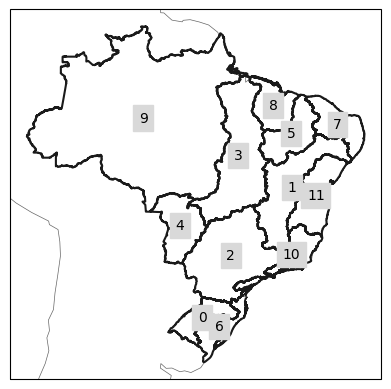

In [25]:
#pegar todos os contornos da bacia

mask_BAC = rmk.from_geopandas(BAC_shp)
mask_BAC
mask_BAC.plot()



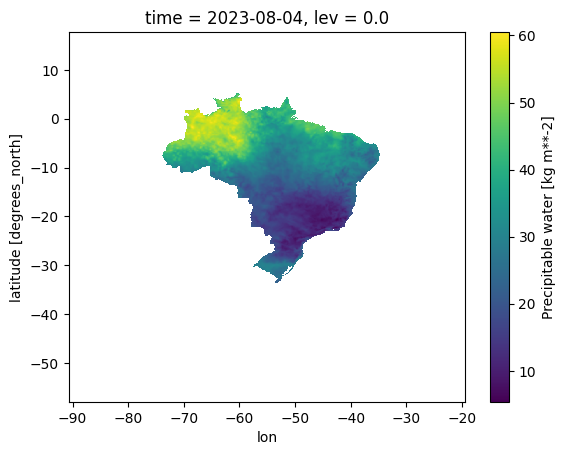

In [26]:

prec_w_maskBAC = mask_BAC.mask(prec_w)

prec_w_mask_BAC= prec_w.where(prec_w_maskBAC >=0)
prec_w_mask_BAC.plot()

In [28]:
print('arte')

prec_w_mask_BAC

arte


<xarray.DataArray 'pwat' (time: 1, lev: 1, lat: 1081, lon: 1019)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-08-04
  * lat      (lat) float64 -57.9 -57.83 -57.76 -57.69 ... 17.49 17.56 17.63 17.7
  * lev      (lev) float64 0.0
  * lon      (lon) float64 -90.67 -90.6 -90.53 -90.46 ... -19.55 -19.48 -19.41
Attributes:
    long_name:    Precipitable water
    units:        kg m**-2
    param:        3.1.0
    institution:  NCEP

In [29]:
#relembrando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import geopandas as gpd
import regionmask as rmk
import netCDF4 as nc
import pandas as pd

In [30]:
BAC_shp = gpd.read_file(path_shape_BACIA)
mask_BAC = rmk.from_geopandas(BAC_shp)


In [31]:
mask_BAC

<regionmask.Regions>
Name:     unnamed
overlap:  False

Regions:
 0  r0  Region0
 1  r1  Region1
 2  r2  Region2
 3  r3  Region3
 4  r4  Region4
..  ..      ...
 7  r7  Region7
 8  r8  Region8
 9  r9  Region9
10 r10 Region10
11 r11 Region11

[12 regions]

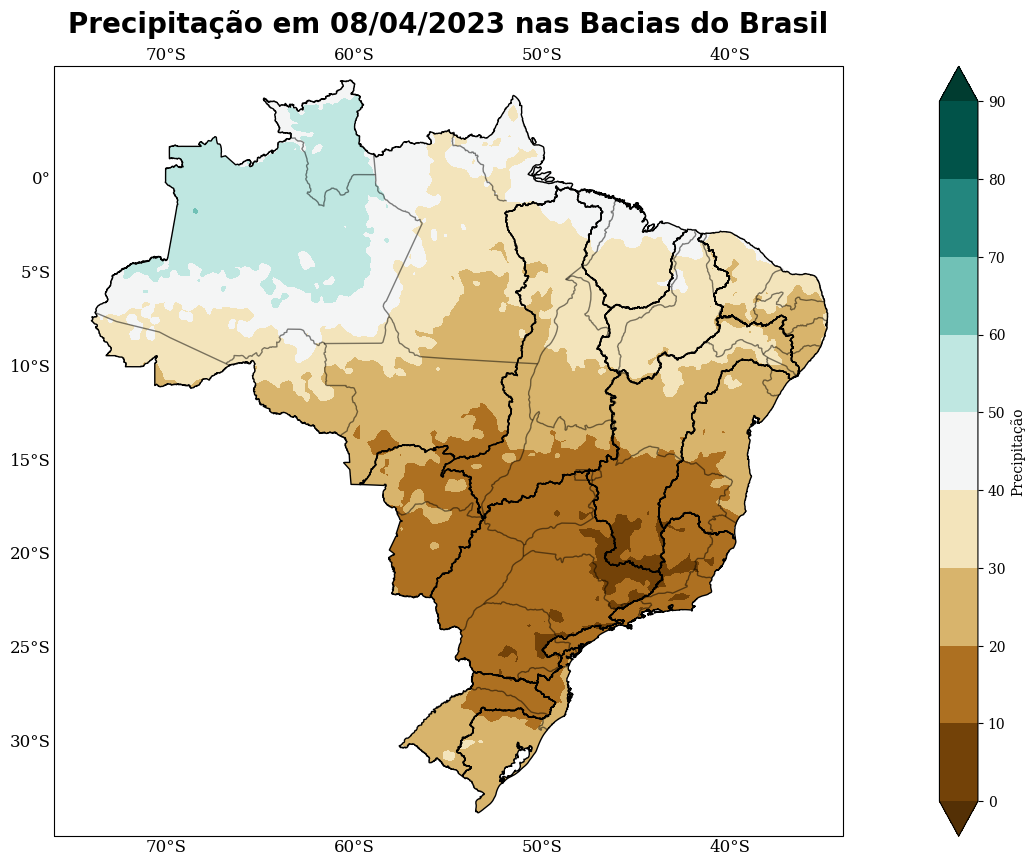

In [32]:
#plotando o mapa foco de chuva nas Bacias do Brasil

import matplotlib.ticker as mticker  # Adicione esta linha

fig, axs = plt.subplots(1, 1, figsize=(25, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
#ano_list = np.arange(2011, 2021, 1)
#fig, axs = plt.subplots(2,5,figsize = (25, 10), suplot_kw = dict(projection = ccrs.PlateCarree()))
#2 linhas e 5colunas
#semi plot
#axs_list = axs.ravel()

font_g1 ={'size':12, 'color':'black'}

plt.rcParams['font.family'] = 'serif'

states= NaturalEarthFeature(category='cultural', scale='50m', facecolor='none', name='admin_1_states_provinces_lines')

# Selecionar o tempo desejado
tempo_desejado = pd.Timestamp('2023-08-04')  # Substitua pela data desejada

# Encontrar o índice correspondente ao tempo desejado
indice_tempo = np.where(prec_w.time.values == np.datetime64(tempo_desejado))[0][0]

# Selecionar os dados de precipitação para o tempo desejado
precipitation_selected_time = prec_w_mask_BAC[indice_tempo]

precipitation_2D = np.mean(precipitation_selected_time, axis=0)
#tem 12 axs
#axs_list[i] acessar a cada item
#for i in range(10):

plot_anom = axs.contourf(prec_w_mask_BAC.lon, prec_w_mask_BAC.lat,precipitation_2D, transform =ccrs.PlateCarree(),cmap='BrBG', levels = np.arange(0,100,10), extend ='both')
                    #níveis negativos np.arange -500 e +500 chuva, cmap cor mapa, marrom negativo verde positivo
                    #variável discreta, extend  = both ambos, extendo tanto para o máximo quanto o mínimo

    #dominio da figura
axs.add_feature(states, edgecolor ='black', linewidth=1, alpha=0.5, linestyle='-')
    
axs.set_xlim(left = -76 ,right = -34)
axs.set_ylim(bottom = -35, top=6)

    
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, alpha =0)
    
gl.top_lavels=False
gl.bottom_labels = True
gl.left_labels= True
gl.right_labels = False
gl.xpadding=2
gl.ypadding=2
gl.xformatter = LONGITUDE_FORMATTER
gl.xformatter = LATITUDE_FORMATTER
#gl.xlocator = mticker.FixedLocator(np.arange())
#gl.ylocator = mticker.FixedLocator(np.arange())
gl.xlocator = mticker.FixedLocator(np.arange(-70,-30,10))
gl.ylocator = mticker.FixedLocator(np.arange(-30,5,5))
gl.xlabel_style = font_g1
gl.ylabel_style = font_g1
    
     
BAC_shp.plot(ax = axs, lw =1, ec='black', fc = 'none')
   
   

plt.colorbar(plot_anom, ax=axs, orientation='vertical', label='Precipitação')
#axs.set_title(f'Precipitacao {tempo_desejado}', fontsize=20, fontweight='bold', pad=10)
axs.set_title('Precipitação em 08/04/2023 nas Bacias do Brasil', fontsize=20, fontweight='bold', pad=10)

plt.show()   
   
